<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

### 1. Read in the Sacramento housing data set.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
sac_csv = '/Users/kylesokolis/dsi/submissions/datasets/sacramento_real_estate_transactions.csv'

In [3]:
# A:
shd = pd.read_csv(sac_csv)

In [4]:
shd.head()

,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_types
0,0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST
1,1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT
2,2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST
3,3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY
4,4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR


In [5]:
shd['zip'] = shd['zip'].astype('str')

In [6]:
shd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 15 columns):
Unnamed: 0      985 non-null int64
Unnamed: 0.1    985 non-null int64
street          985 non-null object
city            985 non-null object
zip             985 non-null object
state           985 non-null object
beds            985 non-null int64
baths           985 non-null int64
sq__ft          985 non-null int64
type            985 non-null object
sale_date       985 non-null object
price           985 non-null int64
latitude        985 non-null float64
longitude       985 non-null float64
street_types    985 non-null object
dtypes: float64(2), int64(6), object(7)
memory usage: 115.5+ KB


In [7]:
shd.loc[shd['sq__ft'] < 0]

,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_types


In [8]:
#pull out the row and column that needs to be changed
shd.iloc[703,6]
#change the value
shd.iloc[703,6] = 984

In [9]:
#check to verify change occured
shd.loc[shd['sq__ft'] < 0]

,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_types


In [10]:
shd['street_types'] = shd['street'].apply(lambda x: x.split()[-1])

shd['street_types'].value_counts()[:10]

WAY     301
DR      156
CT      125
CIR     112
ST       80
AVE      74
LN       41
RD       27
BLVD     11
PL       10
Name: street_types, dtype: int64

In [11]:
streets = ['WAY', 'DR', 'CT', 'CIR', 'ST', 'AVE', 'LN', 'RD', 'BLVD', 'PL']

shd['street_types'] = [street if street in streets else 'OTHER' for street in shd['street_types']]

In [12]:
shd.head()

,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_types
0,0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST
1,1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT
2,2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST
3,3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY
4,4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR


### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [13]:
# A:
shd.sort_values(['latitude'])

,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_types
703,703,703,1900 DANBROOK DR,SACRAMENTO,95835,AC,984,984,984,Condo,Fri May 16 00:00:00 EDT 2008,210944,-121.503471,38.668433,DR
174,174,174,1121 CREEKSIDE WAY,GALT,95632,CA,3,1,1080,Residential,Tue May 20 00:00:00 EDT 2008,106716,38.241514,-121.312199,WAY
372,372,372,201 CARLO CT,GALT,95632,CA,3,2,1080,Residential,Mon May 19 00:00:00 EDT 2008,122000,38.242270,-121.310320,CT
820,820,820,14004 WALNUT AVE,WALNUT GROVE,95690,CA,3,1,1727,Residential,Fri May 16 00:00:00 EDT 2008,380000,38.247659,-121.515129,AVE
63,63,63,404 6TH ST,GALT,95632,CA,3,1,1479,Residential,Wed May 21 00:00:00 EDT 2008,188741,38.251808,-121.302493,ST
508,508,508,200 OAKWILDE ST,GALT,95632,CA,4,2,1606,Residential,Mon May 19 00:00:00 EDT 2008,353767,38.253500,-121.318120,ST
761,761,761,294 SPARROW DR,GALT,95632,CA,4,3,2214,Residential,Fri May 16 00:00:00 EDT 2008,278000,38.258976,-121.321266,DR
957,957,957,82 WILDFLOWER DR,GALT,95632,CA,3,2,1262,Residential,Thu May 15 00:00:00 EDT 2008,209347,38.259708,-121.311616,DR
61,61,61,306 CAMELLIA WAY,GALT,95632,CA,3,2,1130,Residential,Wed May 21 00:00:00 EDT 2008,182750,38.260443,-121.297864,WAY
409,409,409,332 PALIN AVE,GALT,95632,CA,3,2,1204,Residential,Mon May 19 00:00:00 EDT 2008,174000,38.260467,-121.302636,AVE


In [14]:
shd.loc[703,['latitude','longitude']] = shd.loc[703,['longitude','latitude']].values


In [15]:
shd.sort_values(['price'])
shd['price'] = shd['price'].abs()

In [16]:
shd.sort_values(['price']).head()


,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude,street_types
865,865,865,3720 VISTA DE MADERA,LINCOLN,95648,CA,3,3,0,Residential,Fri May 16 00:00:00 EDT 2008,1551,38.851645,-121.231742,OTHER
866,866,866,14151 INDIO DR,SLOUGHHOUSE,95683,CA,3,4,5822,Residential,Fri May 16 00:00:00 EDT 2008,2000,38.490447,-121.129337,DR
580,580,580,59 E ST,LINCOLN,95648,CA,3,2,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.885794,-121.290281,ST
584,584,584,386 1ST ST,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886528,-121.288869,ST
585,585,585,374 1ST ST,LINCOLN,95648,CA,0,0,0,Residential,Mon May 19 00:00:00 EDT 2008,4897,38.886525,-121.288787,ST


In [17]:
X = shd.drop(['zip', 'street_types', 'sale_date', 'type', 'state', 'street', 'city'], axis=1)
y = shd['zip']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [19]:
lm = LinearRegression()

lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [20]:
lm.score(X_train, y_train)

0.29784057562388255

In [21]:
y_hat_train = lm.predict(X_train)

In [22]:
metrics.mean_squared_error(y_train, y_hat_train)

5035.925856696405

In [23]:
X_train_corr = X_train.corr()

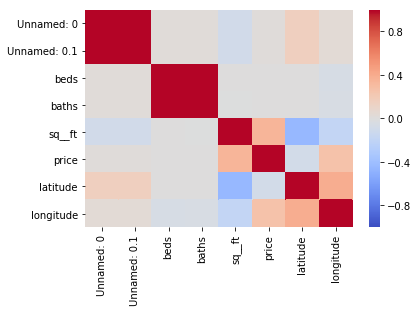

In [24]:
sns.heatmap(X_train_corr, vmin= -1, cmap='coolwarm');

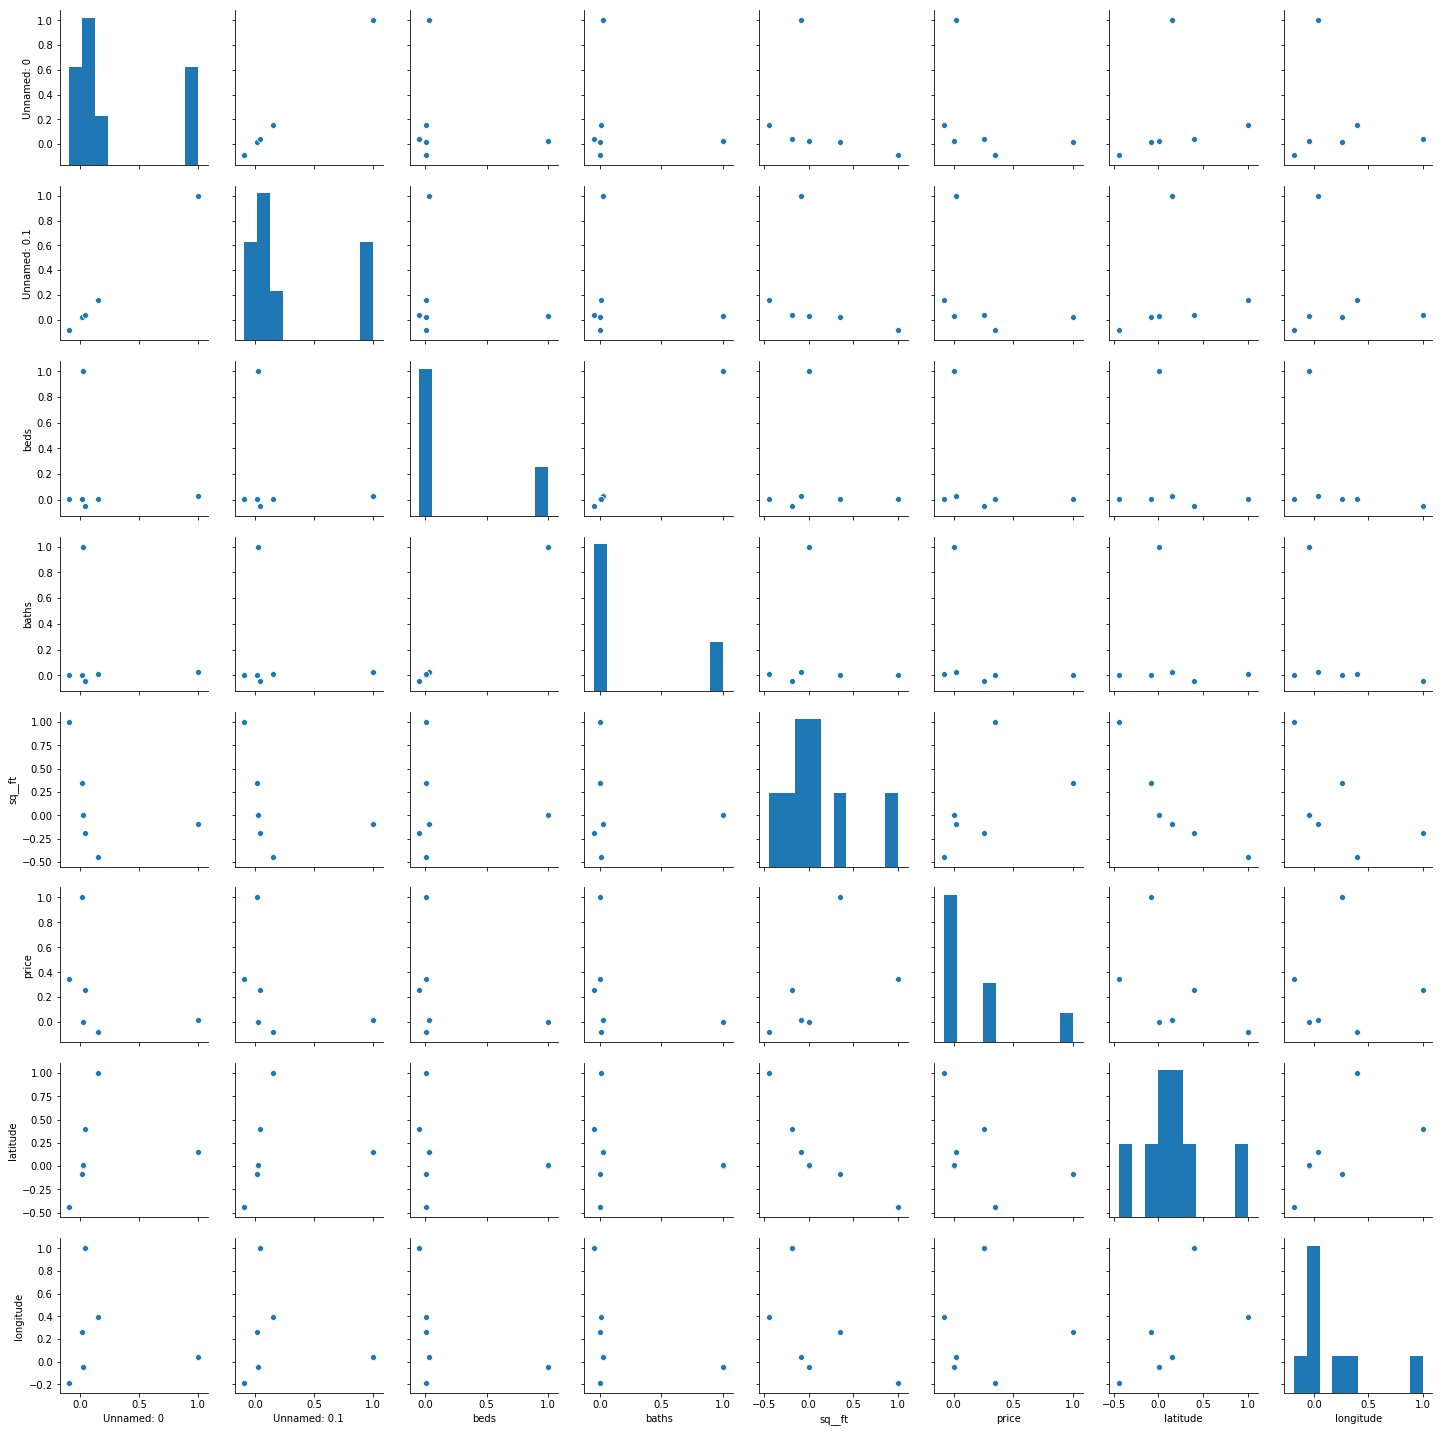

In [25]:
sns.pairplot(X_train_corr);

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

/anaconda3/envs/dsi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


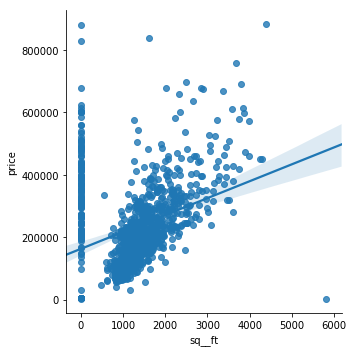

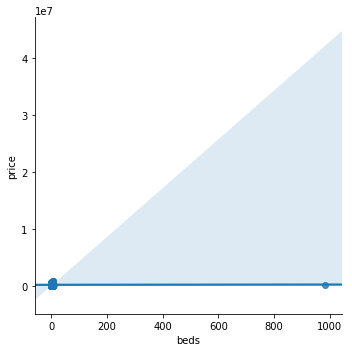

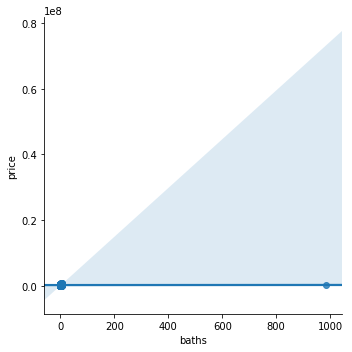

In [26]:
sns.lmplot(x='sq__ft', y='price', data=shd)
plt.show()
sns.lmplot(x='beds', y='price', data=shd)
plt.show()
sns.lmplot(x='baths', y='price', data=shd)
plt.show()

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [27]:
shd.to_csv('/Users/kylesokolis/dsi/submissions/datasets/sacramento_real_estate_transactions.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

# ***Answer:***
It would appear as though square footage would be the best indicator. Bed and bath actually take away from the SLR accuracy.

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [28]:
import numpy as np
import scipy.stats

# Get the optimal Slope and y intercept

def lin_reg(x,y):
    # Using other libraries for standard Deviation and Pearson Correlation Coef.
    # Note that in SLR, the correlation coefficient multiplied by the standard
    # deviation of y divided by standard deviation of x is the optimal slope.
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    
    # Pearson Co. Coef returns a tuple so it needs to be sliced/indexed
    # the optimal beta is found by: mean(y) - b1 * mean(x)
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    #Print the Optimal Values
    print('The Optimal Y Intercept is ', beta_0)
    print('The Optimal slope is ', beta_1)

In [29]:
x = shd['sq__ft'].values
y = shd['price'].values
lin_reg(x,y)

The Optimal Y Intercept is  162930.16140699777
The Optimal slope is  54.158639688530755


### 6. Interpret the intercept. Interpret the slope.

# Answer:
# 162930.16 is where the y intercept increases as x increases.

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

# A:

# Prediction

# Ford car salesman with a different database on Ford characteristics and locations.
# You want to estimate the most likely price that one of these Fords will sell at based on the model that we built using this data.

# Inference
# You work for an architecture company that wants to understand what characteristics of a house
# and what areas are associated with perceived value. You have some hypotheses about what
# makes a house valuable but you would like to test these hypotheses.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [30]:
# A:

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [31]:
# A:
shd_type_dummies = pd.get_dummies(shd['type'])

shd = shd.join(shd_type_dummies)

shd = shd.drop(['type'], axis=1)

shd.head()

,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,street_types,Condo,Multi-Family,Residential,Unkown
0,0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST,0,0,1,0
1,1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT,0,0,1,0
2,2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST,0,0,1,0
3,3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY,0,0,1,0
4,4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR,0,0,1,0


---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [32]:
# A:
shd.describe().sum()

Unnamed: 0      4.221489e+03
Unnamed: 0.1    4.221489e+03
beds            2.013197e+03
baths           2.008084e+03
sq__ft          1.294896e+04
price           1.918586e+06
latitude        1.216820e+03
longitude       2.575149e+02
Condo           9.862826e+02
Multi-Family    9.861274e+02
Residential     9.901846e+02
Unkown          9.860329e+02
dtype: float64

In [33]:
shd = shd.drop(['Unkown'], axis=1)

In [34]:
shd.describe().sum()

Unnamed: 0      4.221489e+03
Unnamed: 0.1    4.221489e+03
beds            2.013197e+03
baths           2.008084e+03
sq__ft          1.294896e+04
price           1.918586e+06
latitude        1.216820e+03
longitude       2.575149e+02
Condo           9.862826e+02
Multi-Family    9.861274e+02
Residential     9.901846e+02
dtype: float64

### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

In [35]:
shd['sq__ft'].replace(0, np.nan, inplace=True)

In [36]:
shd.isnull().sum()

Unnamed: 0        0
Unnamed: 0.1      0
street            0
city              0
zip               0
state             0
beds              0
baths             0
sq__ft          171
sale_date         0
price             0
latitude          0
longitude         0
street_types      0
Condo             0
Multi-Family      0
Residential       0
dtype: int64

In [37]:
shd.shape

(985, 17)

In [38]:
shd.dropna(inplace=True)


In [39]:
shd.shape

(814, 17)

In [40]:
sqft_cut = pd.cut(shd['sq__ft'], (1, 1200, 2500, 100000), labels=('Less Than', 'Middle', 'More Than'))

In [41]:
dummy_sqft = pd.get_dummies(sqft_cut)
dummy_sqft = pd.DataFrame(dummy_sqft)

In [42]:
shd = pd.concat([shd, dummy_sqft], axis=1)

In [43]:
shd.head()

,Unnamed: 0,Unnamed: 0.1,street,city,zip,state,beds,baths,sq__ft,sale_date,price,latitude,longitude,street_types,Condo,Multi-Family,Residential,Less Than,Middle,More Than
0,0,0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836.0,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879,ST,0,0,1,1,0,0
1,1,1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167.0,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028,CT,0,0,1,1,0,0
2,2,2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796.0,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839,ST,0,0,1,1,0,0
3,3,3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852.0,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146,WAY,0,0,1,1,0,0
4,4,4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797.0,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768,DR,0,0,1,1,0,0


In [44]:
print(shd['Less Than'].value_counts())
print(shd['Middle'].value_counts())
print(shd['More Than'].value_counts())

0    564
1    250
Name: Less Than, dtype: int64
1    490
0    324
Name: Middle, dtype: int64
0    740
1     74
Name: More Than, dtype: int64


In [45]:
shd.drop('Unnamed: 0', axis=1, inplace=True)

In [46]:
shd.shape

(814, 19)

In [48]:
# A:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [56]:
model.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [58]:
model.score(X_train, y_train)

1.0

In [53]:
model.coef_

array([ 1.25325403e-14,  1.27104403e-14, -2.55363320e-11,  2.24955772e-11,
        3.14065171e-14,  1.00000000e+00,  6.77569543e-12, -1.69445577e-12])

In [75]:
predit_price = pd.DataFrame(model.predict(X_test))

In [76]:
true_price = pd.DataFrame(shd['price'])

In [84]:
predit_price.head()

,0
0,170000.0
1,125000.0
2,125000.0
3,465000.0
4,100000.0


In [85]:
true_price.head()

,price
0,59222
1,68212
2,68880
3,69307
4,81900


In [77]:
predit_price.shape

(296, 1)

In [78]:
true_price.shape

(814, 1)

In [80]:
pd.concat([predit_price][true_price])

TypeError: list indices must be integers or slices, not DataFrame

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

KeyError: "['true_price' 'predit_price'] not in index"

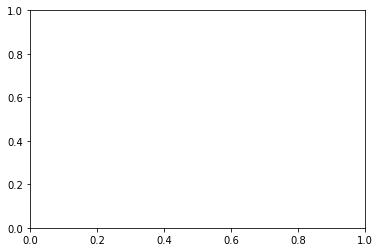

In [74]:
# A:
shd.boxplot(column=['true_price', 'predit_price'])

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

In [ ]:
# A:

### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [ ]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [ ]:
# A:

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [ ]:
# A:

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [ ]:
# A:

### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

In [ ]:
# A: